## The pandas library

The pandas library is an open-source Python library that provides easy-to-use high-performance data structures and data analysis tools. It provides two main data structures:

* DataFrames
* Series

You will spend most of your time in this program working with DataFrames. But DataFrames and Series are closely related, so you'll take a brief look at Series as well.

### Series

A pandas *Series* can be thought of a single column in a spreadsheet. It is a one-dimensional array of values.

In [1]:
# First, import pandas
import pandas as pd
import numpy as np

# Create a Series from an array
ages = pd.Series(np.array([20, 34, 28, 26, 39, 35, 34, 36, 38]))

# Print this Series
print(ages)

0    20
1    34
2    28
3    26
4    39
5    35
6    34
7    36
8    38
dtype: int64


The numbers on the left are row index numbers that have been automatically generated. Again, imagine a spreadsheet with just a single column. Even that spreadsheet will have row numbers on the left.

It's also possible to set your own string-based index.

In [2]:
age_array = np.array([50, 51, 39, 38, 124, 2013, 45, 1768, 98])
names_list = ['Sam', 'Frodo', 'Merry', 'Pippin', 'Aragorn', 'Gandalf', 'Boromir', 'Legolas', 'Gimli']

fellowship = pd.Series(age_array, index=names_list)

print(fellowship)

Sam          50
Frodo        51
Merry        39
Pippin       38
Aragorn     124
Gandalf    2013
Boromir      45
Legolas    1768
Gimli        98
dtype: int64


Alternatively, you could use a Python dictionary to create a Series:

In [3]:
# Here is a dictionary of teams and points
teams = {
    'Liverpool': 69,
    'Man City': 68,
    'Tottenham': 60,
    'Arsenal': 56,
    'Man United': 55
}

# Construct a Series from the dictionary
standings = pd.Series(teams)

# Print the Series
print(standings)

Liverpool     69
Man City      68
Tottenham     60
Arsenal       56
Man United    55
dtype: int64


### Basic operations

pandas has a few basic operations built into the Series. The full list of attributes and methods can be found in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Here are a few examples:

In [4]:
print('The oldest age is {}'.format(fellowship.max()))
print('The youngest age is {}'.format(fellowship.min()))
print('The mean points in the league is {}'.format(standings.mean()))
print('The standard deviation of points in the league is {}'.format(standings.std()))

The oldest age is 2013
The youngest age is 38
The mean points in the league is 61.6
The standard deviation of points in the league is 6.58027355054484


The `describe()` method provides all these values with a single method call, and it can be quite helpful in analyzing central tendency.

In [5]:
standings.describe()

count     5.000000
mean     61.600000
std       6.580274
min      55.000000
25%      56.000000
50%      60.000000
75%      68.000000
max      69.000000
dtype: float64

## DataFrames

If a Series is a single column in a spreadsheet, then the *DataFrame* is an entire spreadsheet. It is a two-dimensional structure with labeled axes.

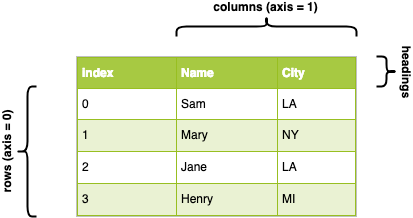



There are a number of ways to create a DataFrame. Most commonly, the data is read from some source, such as a file or a database. Then the DataFrame is constructed from that data. Next, you're going to explore the four most common ways to create DataFrames:

   * From a CSV file using `read_csv()`
   * From in-memory lists
   * From JSON data using `read_json()`
   * From a database using `read_sql_query()` or `read_sql_table()`


  ## From CSV

In [6]:
import pandas as pd
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-analytics-bootcamp/songs.csv')

The variable named `df` contains the DataFrame. Notice that there isn't any further information about the data here. The pandas library will attempt to infer the columns and data types from the data in the file, and there are some options for specifying what you expect. But first, explore the data that was found. There are a number of methods and attributes of the DataFrame, and you can use these to examine the DataFrame itself.

First, review the list of columns with the corresponding number of values and data types:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song Clean    2229 non-null   object
 1   ARTIST CLEAN  2229 non-null   object
 2   Release Year  1652 non-null   object
 3   COMBINED      2229 non-null   object
 4   First?        2229 non-null   int64 
 5   Year?         2229 non-null   int64 
 6   PlayCount     2229 non-null   int64 
 7   F*G           2229 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 139.4+ KB


There is a lot of information in this output. The first line simply tells you that the object is a DataFrame. The second line is as follows:

```
RangeIndex: 2229 entries, 0 to 2228
```

This states that an index that ranges from `0` to `2228` was created for the rows. That means that this DataFrame contains 2,229 rows numbered from 0 to 2,228.

Next, the column information is given. There are eight columns in total. For each column, the name of the column, the total number of non-null values, and the data type of the column are given. For example, the column named *Song Clean* has 2,229 entries and is of type `object`, which means that it's a string in this case.

The *Release Year* column only has 1,652 entries, implying that some of the rows in that column contain null values. This is important to note if your analysis uses that field later.

There are optional parameters you can use with the `info()` method that are especially helpful if you're working with very large datasets, like the type you'll encounter in your capstone project. Those parameters are `verbose` and `show_counts`, and using them together will display the complete information about your DataFrame as expected. If you apply these parameters to your previous code cell, you'll see this:

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song Clean    2229 non-null   object
 1   ARTIST CLEAN  2229 non-null   object
 2   Release Year  1652 non-null   object
 3   COMBINED      2229 non-null   object
 4   First?        2229 non-null   int64 
 5   Year?         2229 non-null   int64 
 6   PlayCount     2229 non-null   int64 
 7   F*G           2229 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 139.4+ KB


You can also list the column names:

In [9]:
df.columns

Index(['Song Clean', 'ARTIST CLEAN', 'Release Year', 'COMBINED', 'First?',
       'Year?', 'PlayCount', 'F*G'],
      dtype='object')

Or you can list the data types:

In [10]:
df.dtypes

Song Clean      object
ARTIST CLEAN    object
Release Year    object
COMBINED        object
First?           int64
Year?            int64
PlayCount        int64
F*G              int64
dtype: object

The shape of the DataFrame is the row dimensions by the column dimensions. You know that you have 2,229 rows and 8 columns.

In [11]:
df.shape

(2229, 8)

## View the data
Later, you will look at various ways to select the data in a DataFrame. But for now, look at a simple way to take a peek at the data, just to verify that you have a correct DataFrame. To view the data, you can try printing the entire DataFrame. Although that works well for small DataFrames, most of the DataFrames that you will encounter in practice will probably be too large to make printing practical. For example, printing the 2,229 rows in this DataFrame would be impractical. Instead, you can just select a subset of the rows and print just those. The `head()` method prints the first five rows of the dataset, and the `tail()` method prints the last five rows. Take a look:

In [12]:
# Select the first 5 rows
df.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [13]:
# Select the last 5 rows
df.tail()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
2224,She Loves My Automobile,ZZ Top,NaN,She Loves My Automobile by ZZ Top,1,0,1,0
2225,Tube Snake Boogie,ZZ Top,1981,Tube Snake Boogie by ZZ Top,1,1,32,32
2226,Tush,ZZ Top,1975,Tush by ZZ Top,1,1,109,109
2227,TV Dinners,ZZ Top,1983,TV Dinners by ZZ Top,1,1,1,1
2228,WAITIN' FOR THE BUS/JESUS JUST LEFT CHICAGO,ZZ Top,1973,WAITIN' FOR THE BUS/JESUS JUST LEFT CHICAGO by...,1,1,2,2


In [14]:
# The `head()` and `tail()` methods take an optional number to vary the number of rows returned.
# Select the first 10 rows:
df.head(10)

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1
5,Kryptonite,3 Doors Down,2000,Kryptonite by 3 Doors Down,1,1,13,13
6,Loser,3 Doors Down,2000,Loser by 3 Doors Down,1,1,1,1
7,When I'm Gone,3 Doors Down,2002,When I'm Gone by 3 Doors Down,1,1,6,6
8,What's Up?,4 Non Blondes,1992,What's Up? by 4 Non Blondes,1,1,3,3
9,Take On Me,a-ha,1985,Take On Me by a-ha,1,1,1,1


Now, create a function that will print some of this basic information about the DataFrame so that you can use it as you load up new DataFrames.


In [15]:
def printDataFrame(df):
  print('The shape of this DataFrame is {}'.format(df.shape))
  print('The columns in this DataFrame are {}'.format(df.columns))
  print('The info:')
  print(df.info())

In [16]:
printDataFrame(df)
df.head(2)

The shape of this DataFrame is (2229, 8)
The columns in this DataFrame are Index(['Song Clean', 'ARTIST CLEAN', 'Release Year', 'COMBINED', 'First?',
       'Year?', 'PlayCount', 'F*G'],
      dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song Clean    2229 non-null   object
 1   ARTIST CLEAN  2229 non-null   object
 2   Release Year  1652 non-null   object
 3   COMBINED      2229 non-null   object
 4   First?        2229 non-null   int64 
 5   Year?         2229 non-null   int64 
 6   PlayCount     2229 non-null   int64 
 7   F*G           2229 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 139.4+ KB
None


,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0


## From in-memory lists

Sometimes, you need to create a DataFrame from in-memory data. For example, suppose that you had the following league table for a popular sport:

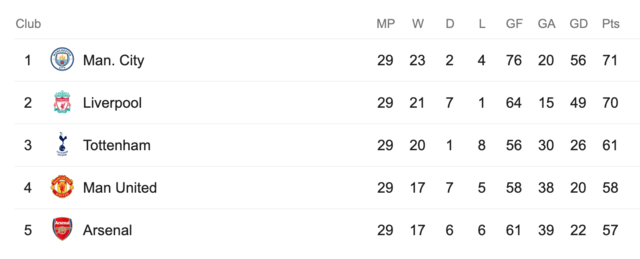


Here's how you could create a DataFrame with that data.

In [17]:
# Define a list of column labels
columns = ['club', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']

# Define rows
rows = [
    ['Man. City', 29, 23, 2, 4, 76, 20, 56, 71],
    ['Liverpool', 29, 21, 7, 1, 64, 15, 49, 70],
    ['Tottenham', 29, 20, 1, 8, 56, 30, 26, 61],
    ['Man U', 29, 17, 7, 5, 58, 38, 20, 58],
    ['Arsenal', 29, 17, 6, 6, 61, 39, 22, 57]
]

league_df = pd.DataFrame(data=rows, columns=columns)

printDataFrame(league_df)
league_df.head(2)

The shape of this DataFrame is (5, 9)
The columns in this DataFrame are Index(['club', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   club    5 non-null      object
 1   MP      5 non-null      int64 
 2   W       5 non-null      int64 
 3   D       5 non-null      int64 
 4   L       5 non-null      int64 
 5   GF      5 non-null      int64 
 6   GA      5 non-null      int64 
 7   GD      5 non-null      int64 
 8   Pts     5 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 488.0+ bytes
None


,club,MP,W,D,L,GF,GA,GD,Pts
0,Man. City,29,23,2,4,76,20,56,71
1,Liverpool,29,21,7,1,64,15,49,70


The original data here was a list of lists. If the data was all of the same type, NumPy arrays could be used too. This data was represented in a row-wise manner, which means that for each row, you had a single list.

Alternatively, the data could be represented in memory with a dictionary object. In a dictionary, the data would be represented column-wise.

In [18]:
league_dict = {
    'club' : ['Man. City', 'Liverpool', 'Tottenham', 'Man U', 'Arsenal'],
    'MP' : [29, 29, 29, 29, 29],
    'W' : [23, 21, 20, 17, 17],
    'D' : [2, 7, 1, 7, 6],
    'L' : [4, 1, 8, 5, 6],
    'GF' : [76, 64, 56, 38, 39],
    'GA' : [20, 15, 30, 20, 39],
    'GD' : [56, 49, 26, 20, 22],
    'Pts' : [71, 70, 61, 58, 57]
}

league_df = pd.DataFrame(league_dict)

printDataFrame(league_df)
league_df.head(2)

The shape of this DataFrame is (5, 9)
The columns in this DataFrame are Index(['club', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   club    5 non-null      object
 1   MP      5 non-null      int64 
 2   W       5 non-null      int64 
 3   D       5 non-null      int64 
 4   L       5 non-null      int64 
 5   GF      5 non-null      int64 
 6   GA      5 non-null      int64 
 7   GD      5 non-null      int64 
 8   Pts     5 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 488.0+ bytes
None


,club,MP,W,D,L,GF,GA,GD,Pts
0,Man. City,29,23,2,4,76,20,56,71
1,Liverpool,29,21,7,1,64,15,49,70


## From JSON

JSON (JavaScript Object Notation) is another ubiquitous format for data storage and distribution. JSON is easy to parse and understand, and it is well supported by most languages, including Python.

The `shots.json` file contain vaccination shots given in Texas. It contains an array of data that looks like this:

```
[
  {"location":"Far South","month":"OCT","number_of_shots":"1118","program_name":"Shots for Tots","visits":"436","year":"2010"},
  {"location":"Far South","month":"NOV","number_of_shots":"1600","program_name":"Shots for Tots","visits":"879","year":"2010"},
  {"location":"Far South","month":"DEC","number_of_shots":"1379","program_name":"Shots for Tots","visits":"818","year":"2010"}
,
...
]
```

The data consists of an array of objects representing clinics. Each object has the location,  month and year, number of shots given, and number of visitors.

In [19]:
shots_df = pd.read_json('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-analytics-bootcamp/shots.json')

printDataFrame(shots_df)
shots_df.head(2)

The shape of this DataFrame is (432, 6)
The columns in this DataFrame are Index(['location', 'month', 'number_of_shots', 'program_name', 'visits',
       'year'],
      dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   location         432 non-null    object
 1   month            432 non-null    object
 2   number_of_shots  432 non-null    int64 
 3   program_name     432 non-null    object
 4   visits           432 non-null    int64 
 5   year             432 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 20.4+ KB
None


,location,month,number_of_shots,program_name,visits,year
0,Far South,OCT,1118,Shots for Tots,436,2010
1,Far South,NOV,1600,Shots for Tots,879,2010


## From databases

You already have learned how to work with relational databases. Sometimes, you'll want to get data from one or more databases into pandas. To do that, you'll use what you already learned about Python, Postgres, and the SQLAlchemy library. You'll use those tools to generate a DataFrame from the results of SQL queries.

In [20]:
# Import SQLAlchemy
from sqlalchemy import create_engine, text

# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'medicalcosts'

# Create a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Use a database table to create a DataFrame
insurance_df = pd.read_sql_query(text('SELECT * FROM medicalcosts'), con=engine.connect())

# Remove the connection
engine.dispose()

# See some details of the DataFrame
printDataFrame(insurance_df)
insurance_df.head(2)

The shape of this DataFrame is (1338, 7)
The columns in this DataFrame are Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.90
1,18,male,33.77,1,no,southeast,1725.55


With this query, you can now think of the DataFrame as an in-memory representation of an entire database table. It's equally possible to create DataFrames from queries featuring filters or joins.

In [21]:
# Execute a query and create a DataFrame
females_df = pd.read_sql_query(text("SELECT age, bmi, smoker, region from medicalcosts WHERE sex = 'female'"), con=engine.connect())

# Remove the connection
engine.dispose()

# See some details of the DataFrame
printDataFrame(females_df)
females_df.head(2)

The shape of this DataFrame is (662, 4)
The columns in this DataFrame are Index(['age', 'bmi', 'smoker', 'region'], dtype='object')
The info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     662 non-null    int64  
 1   bmi     662 non-null    float64
 2   smoker  662 non-null    object 
 3   region  662 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 20.8+ KB
None


,age,bmi,smoker,region
0,19,27.90,yes,southwest
1,31,25.74,no,southeast
